<a href="https://colab.research.google.com/github/SolarHO/FX_predict/blob/main/%EB%B3%80%EC%88%98_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 환율, CRB지수, 달러지수 데이터 병합

In [ ]:
import pandas as pd

usd_old = '/content/USD_KRW 과거 데이터.csv'
usd_new = '/content/USD_KRW 과거 데이터 (2).csv'

crb_old = '/content/TR_CC CRB Excess Return 과거 데이터.csv'
crb_new = '/content/TR_CC CRB Excess Return 과거 데이터 (2).csv'

dollar_old = '/content/미국 달러 지수 선물 과거 데이터.csv'
dollar_new = '/content/미국 달러 지수 선물 과거 데이터 (2).csv'

# 전처리 함수 정의
def preprocess(df, name):
    df['날짜'] = df['날짜'].str.replace(" ", "")  # 공백 제거
    df['날짜'] = pd.to_datetime(df['날짜'], format="%Y-%m-%d")  # 날짜 변환
    df['종가'] = df['종가'].astype(str).str.replace(",", "")  # 천단위 쉼표 제거
    df['종가'] = pd.to_numeric(df['종가'], errors='coerce')  # 숫자화
    return df[['날짜', '종가']].rename(columns={'종가': name})

df_usd = pd.concat([
    preprocess(pd.read_csv(usd_old), 'USD/KRW'),
    preprocess(pd.read_csv(usd_new), 'USD/KRW')
]).drop_duplicates(subset='날짜')

df_crb = pd.concat([
    preprocess(pd.read_csv(crb_old), 'CRB'),
    preprocess(pd.read_csv(crb_new), 'CRB')
]).drop_duplicates(subset='날짜')

df_dollar = pd.concat([
    preprocess(pd.read_csv(dollar_old), 'Dollar_Index'),
    preprocess(pd.read_csv(dollar_new), 'Dollar_Index')
]).drop_duplicates(subset='날짜')

# 날짜 기준 병합
df_merge = pd.merge(df_usd, df_crb, on='날짜', how='outer')
df_merge = pd.merge(df_merge, df_dollar, on='날짜', how='outer')

# 정렬 및 결측치 처리(선형보간법)
df_merge = df_merge.sort_values('날짜').reset_index(drop=True)
df_merge[['USD/KRW', 'CRB', 'Dollar_Index']] = df_merge[['USD/KRW', 'CRB', 'Dollar_Index']].interpolate()
df_merge = df_merge.fillna(method='bfill').fillna(method='ffill')

print(df_merge.head())
print(df_merge.tail())

df_merge.to_csv('/content/최종병합_환율_CRB_달러지수.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/USD_KRW 과거 데이터.csv'

In [ ]:
import pandas as pd
df_merge = pd.read_csv('/content/최종병합_환율_CRB_달러지수.csv')
df_merge['날짜'] = pd.to_datetime(df_merge['날짜'])

#2. 세 변수간 상관관계 분석

2-1. 피어슨 상관관계

               USD/KRW       CRB  Dollar_Index
USD/KRW       1.000000 -0.349336      0.607721
CRB          -0.349336  1.000000     -0.636153
Dollar_Index  0.607721 -0.636153      1.000000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

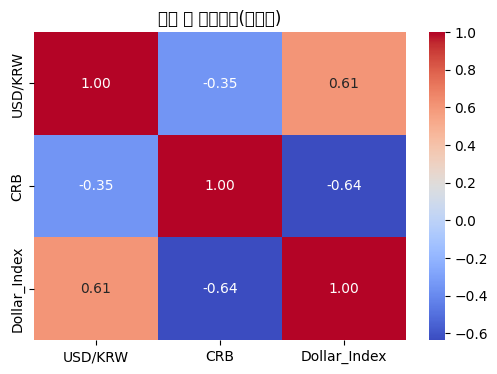

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_merge[['USD/KRW', 'CRB', 'Dollar_Index']].corr()
print(correlation)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("변수 간 상관계수(피어슨)")
plt.show()

2-2 그래프 시작화

<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-dbc4a1a9c4e7>:21: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-in

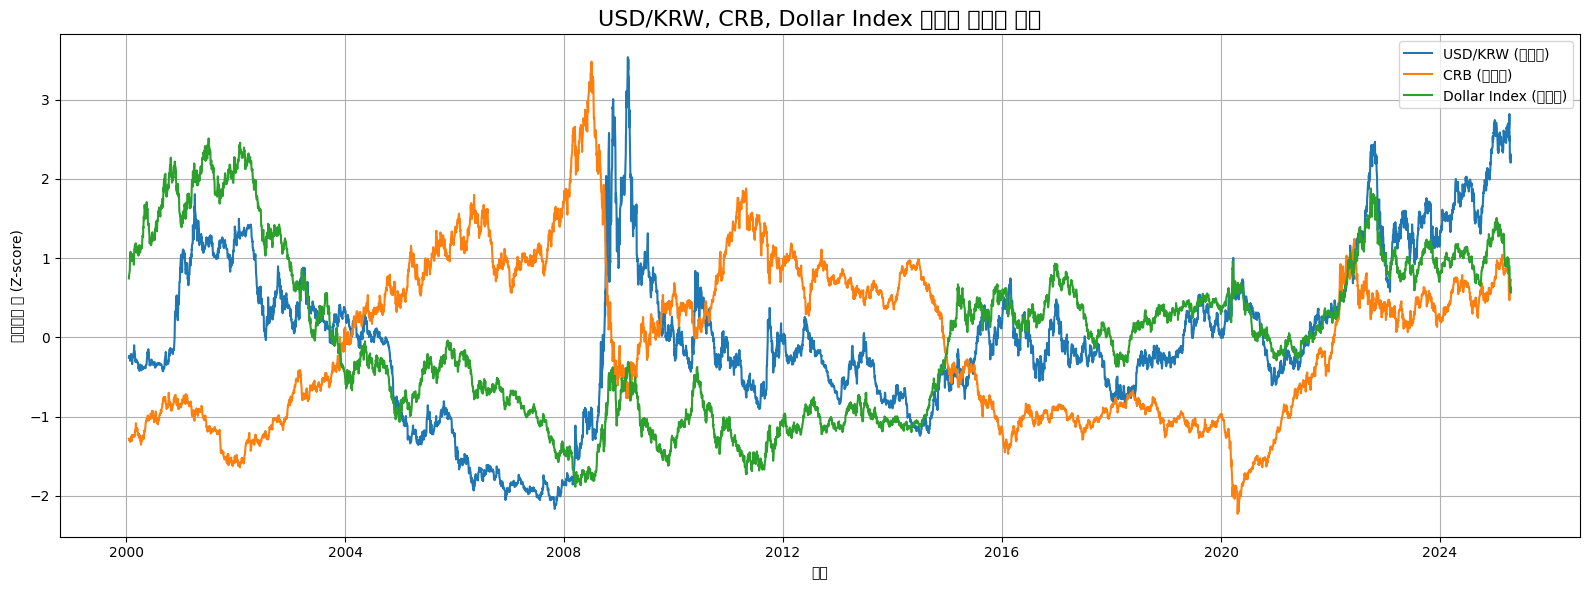

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 표준화
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_merge[['USD/KRW', 'CRB', 'Dollar_Index']])
df_scaled = pd.DataFrame(scaled_values, columns=['USD/KRW', 'CRB', 'Dollar_Index'])
df_scaled['날짜'] = df_merge['날짜']

# 그래프
plt.figure(figsize=(16, 6))
plt.plot(df_scaled['날짜'], df_scaled['USD/KRW'], label='USD/KRW (표준화)', linewidth=1.5)
plt.plot(df_scaled['날짜'], df_scaled['CRB'], label='CRB (표준화)', linewidth=1.5)
plt.plot(df_scaled['날짜'], df_scaled['Dollar_Index'], label='Dollar Index (표준화)', linewidth=1.5)

plt.title('USD/KRW, CRB, Dollar Index 표준화 시계열 비교', fontsize=16)
plt.xlabel('날짜')
plt.ylabel('표준화된 값 (Z-score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2-3. CRB지수 구간별 분석

2000~2019년 상관계수: -0.62
2020~2025년 상관계수: 0.74


<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-6-96156cc92550>:45: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu

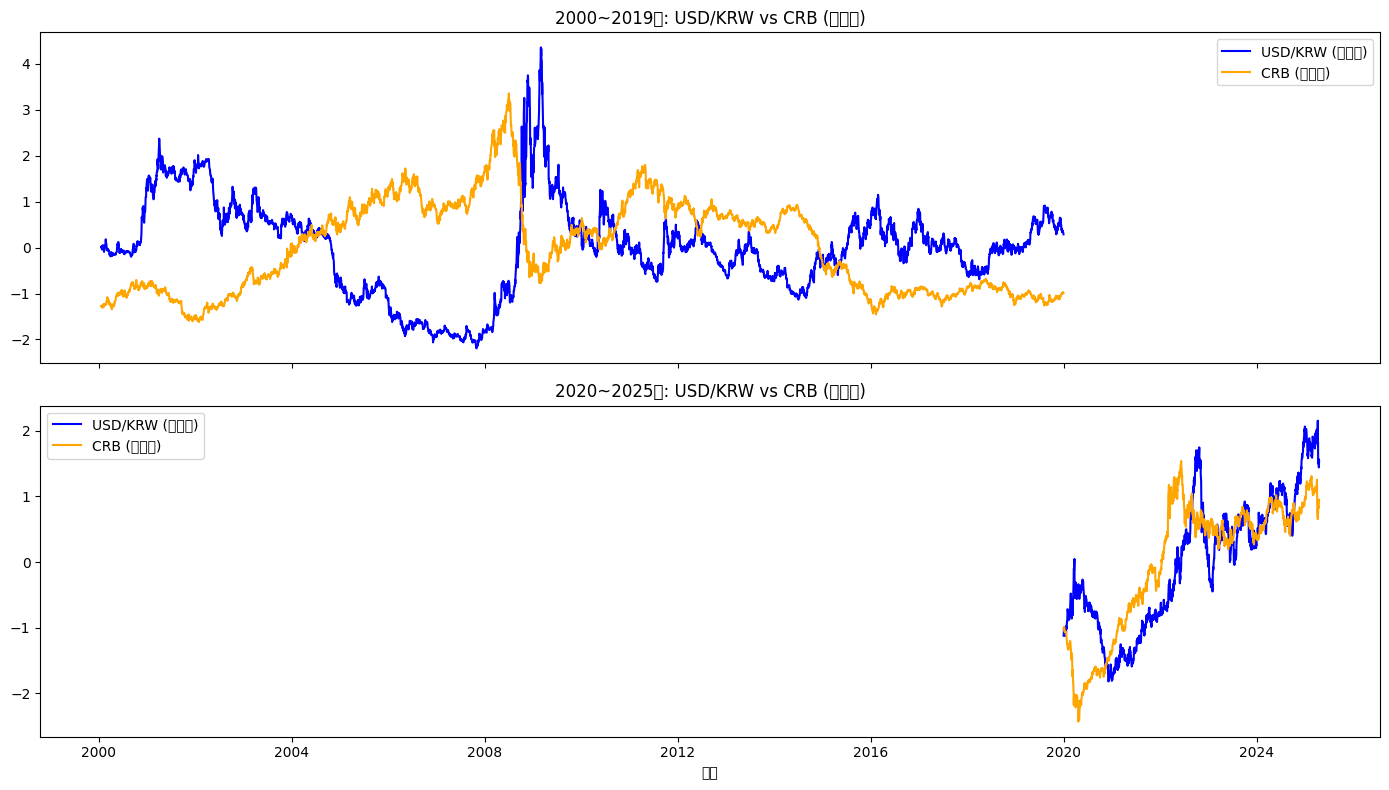

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 데이터 불러오기
df = pd.read_csv("최종병합_환율_CRB_달러지수.csv")
df['날짜'] = pd.to_datetime(df['날짜'])

# 필요한 열만 추출
df_crb = df[['날짜', 'USD/KRW', 'CRB']].dropna()

# 구간 분리
split_date = pd.to_datetime("2020-01-01")
df_before = df_crb[df_crb['날짜'] < split_date].copy()
df_after = df_crb[df_crb['날짜'] >= split_date].copy()

# 피어슨 상관계수 계산
corr_before = df_before[['USD/KRW', 'CRB']].corr(method='pearson').iloc[0, 1]
corr_after = df_after[['USD/KRW', 'CRB']].corr(method='pearson').iloc[0, 1]

print(f"2000~2019년 상관계수: {corr_before:.2f}")
print(f"2020~2025년 상관계수: {corr_after:.2f}")

# 표준화
df_before[['USD/KRW_z', 'CRB_z']] = df_before[['USD/KRW', 'CRB']].apply(zscore)
df_after[['USD/KRW_z', 'CRB_z']] = df_after[['USD/KRW', 'CRB']].apply(zscore)

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

axs[0].plot(df_before['날짜'], df_before['USD/KRW_z'], label='USD/KRW (표준화)', color='blue')
axs[0].plot(df_before['날짜'], df_before['CRB_z'], label='CRB (표준화)', color='orange')
axs[0].set_title('2000~2019년: USD/KRW vs CRB (표준화)')
axs[0].legend()

axs[1].plot(df_after['날짜'], df_after['USD/KRW_z'], label='USD/KRW (표준화)', color='blue')
axs[1].plot(df_after['날짜'], df_after['CRB_z'], label='CRB (표준화)', color='orange')
axs[1].set_title('2020~2025년: USD/KRW vs CRB (표준화)')
axs[1].legend()

plt.xlabel('날짜')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df_merge = pd.read_csv('/content/최종병합_환율_CRB_달러지수.csv')
df_merge['날짜'] = pd.to_datetime(df_merge['날짜'])

# 2. VIX 지수 다운로드 및 날짜 정리
vix = yf.download('^VIX', start='2000-01-20', end='2025-04-19')[['Close']]
vix = vix.rename(columns={'Close': 'VIX'})
vix = vix.reset_index()              # 인덱스를 초기화
vix.columns = ['날짜', 'VIX']        # 날짜 컬럼 이름 통일

# 3. 병합
df_with_vix = pd.merge(df_merge, vix, on='날짜', how='left')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^VIX']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
df_with_vix.to_csv('./병합ver2.csv')

NameError: name 'df_with_vix' is not defined

In [ ]:
import pandas as pd
df_with_vix = pd.read_csv('/content/병합ver2.csv')
df_with_vix['날짜'] = pd.to_datetime(df_with_vix['날짜'])

<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-5-76e0e2e6fd87>:11: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-pack

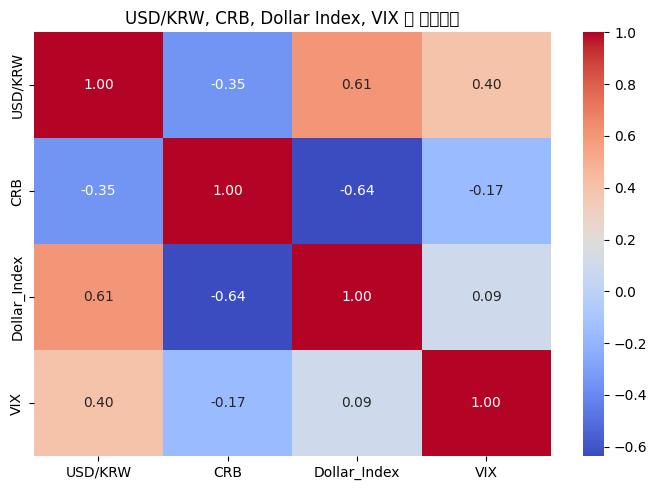

In [ ]:
# 4. 결측치 처리
df_with_vix['VIX'] = df_with_vix['VIX'].interpolate().bfill().ffill()

# 5. 상관계수 분석
corr = df_with_vix[['USD/KRW', 'CRB', 'Dollar_Index', 'VIX']].corr()

# 6. 시각화
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("USD/KRW, CRB, Dollar Index, VIX 간 상관관계")
plt.tight_layout()
plt.show()

In [ ]:
!pip install yfinance
!pip install --upgrade yfinance

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


             날짜       S&P500
0    2000-01-20  1445.569946
1    2000-01-21  1441.359985
2    2000-01-24  1401.530029
3    2000-01-25  1410.030029
4    2000-01-26  1404.089966
...         ...          ...
6345 2025-04-11  5363.359863
6346 2025-04-14  5405.970215
6347 2025-04-15  5396.629883
6348 2025-04-16  5275.700195
6349 2025-04-17  5282.700195

[6350 rows x 2 columns]


<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:41: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipy

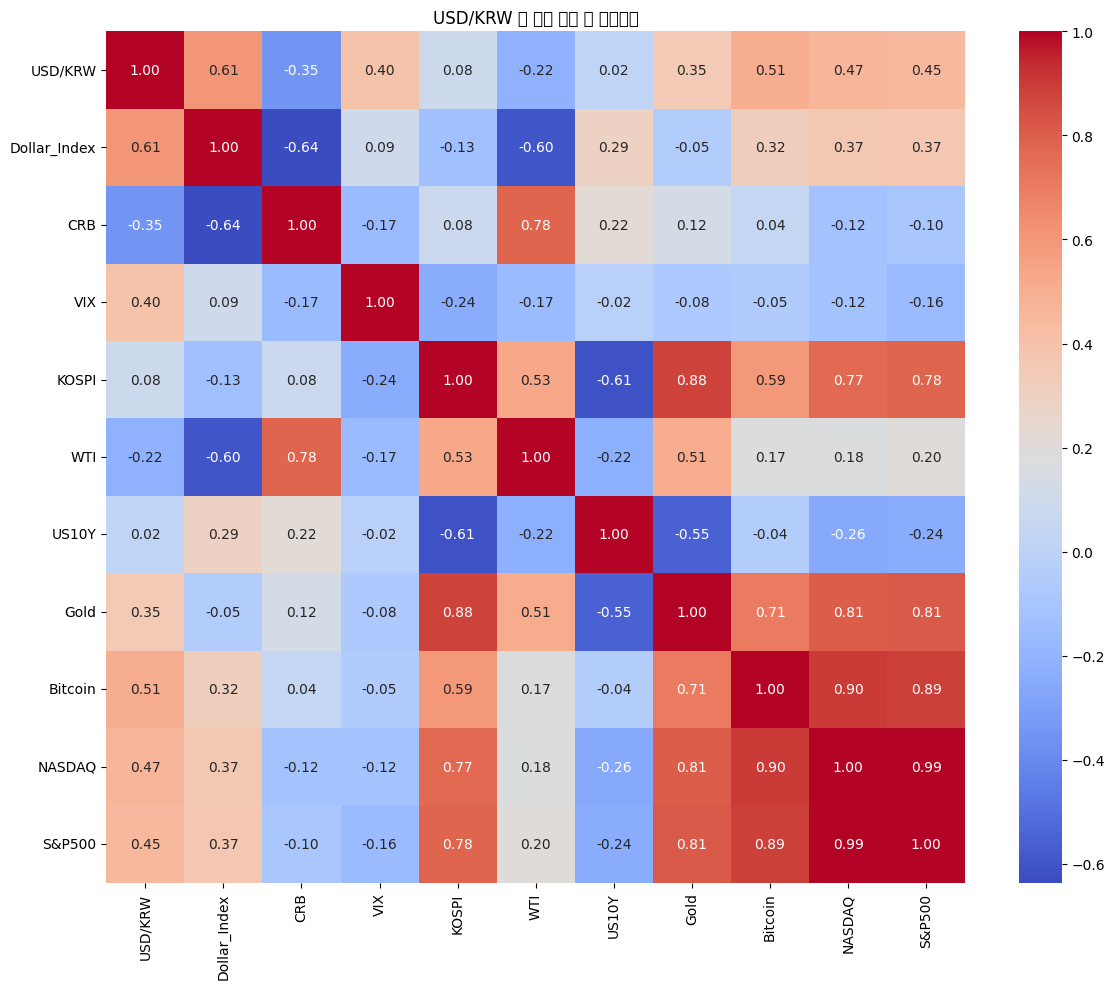

<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-10-b181bdbeb176>:57: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyth

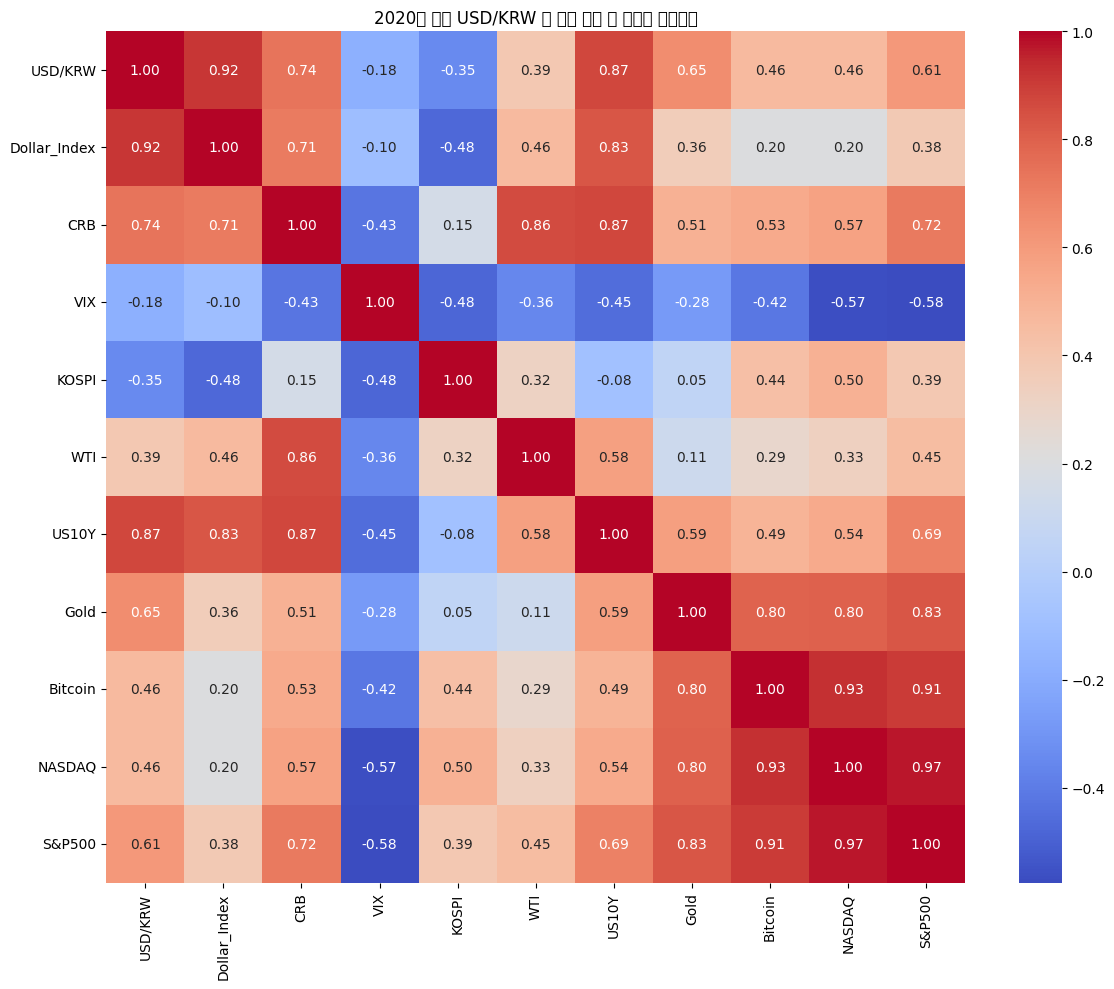

In [ ]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# 다양한 독립 변수 티커 목록
tickers = {
    'KOSPI': '^KS11',
    'WTI': 'CL=F',
    'US10Y': '^TNX',           # 미국 10년물 금리
    'Gold': 'GC=F',            # 금 선물
    'Bitcoin': 'BTC-USD',      # 비트코인
    'NASDAQ': '^IXIC',         # 나스닥 지수
    'S&P500': '^GSPC',         # S&P 500
}

raw_data = {}

# 다운로드 및 병합
df = df_with_vix.copy()
for name, symbol in tickers.items():
    data = yf.download(symbol, start='2000-01-20', end='2025-04-19')[['Close']]
    data = data.rename(columns={'Close': name}).reset_index()
    data.columns = ['날짜', name]
    raw_data[name] = data  # 개별 저장
    df = pd.merge(df, data, on='날짜', how='left')

print(data)

# 결측치 보간
df[list(tickers.keys())] = df[list(tickers.keys())].interpolate().bfill().ffill()

# 상관관계 계산
corr_cols = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX'] + list(tickers.keys())
corr_matrix = df[corr_cols].corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("USD/KRW 및 경제 지표 간 상관관계")
plt.tight_layout()
plt.show()

# 2020년 이후 데이터만 필터링
df_filtered = df[df['날짜'] >= '2020-01-01'].copy()

# 상관계수 계산 대상 열
corr_cols = ['USD/KRW', 'Dollar_Index', 'CRB', 'VIX'] + list(tickers.keys())

# 피어슨 상관계수 계산
corr_matrix = df_filtered[corr_cols].corr(method='pearson')

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("2020년 이후 USD/KRW 및 경제 지표 간 피어슨 상관관계")
plt.tight_layout()
plt.show()



In [ ]:
df.to_csv('./병합ver3.csv')

In [ ]:
# 예: 비트코인 데이터 확인
print("📈 Bitcoin:")
display(raw_data['Bitcoin'])

print("📈 WTI:")
display(raw_data['WTI'])

print("📈 KOSPI:")
display(raw_data['KOSPI'])

print("📈 미국 10년 국채금리:")
display(raw_data['US10Y'])

print("📈 Gold:")
display(raw_data['Gold'])

📈 Bitcoin:


,날짜,Bitcoin
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3862,2025-04-14,84542.390625
3863,2025-04-15,83668.992188
3864,2025-04-16,84033.867188
3865,2025-04-17,84895.750000


📈 WTI:


,날짜,WTI
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001
...,...,...
6184,2025-04-11,61.500000
6185,2025-04-14,61.529999
6186,2025-04-15,61.330002
6187,2025-04-16,62.470001


📈 KOSPI:


,날짜,KOSPI
0,2000-01-20,945.900024
1,2000-01-21,925.159973
2,2000-01-24,926.770020
3,2000-01-25,891.219971
4,2000-01-26,885.539978
...,...,...
6216,2025-04-14,2455.889893
6217,2025-04-15,2477.409912
6218,2025-04-16,2447.429932
6219,2025-04-17,2470.409912


📈 미국 10년 국채금리:


,날짜,US10Y
0,2000-01-20,6.748
1,2000-01-21,6.781
2,2000-01-24,6.684
3,2000-01-25,6.684
4,2000-01-26,6.680
...,...,...
6339,2025-04-11,4.493
6340,2025-04-14,4.364
6341,2025-04-15,4.323
6342,2025-04-16,4.279


📈 Gold:


,날짜,Gold
0,2000-08-30,273.899994
1,2000-08-31,278.299988
2,2000-09-01,277.000000
3,2000-09-05,275.799988
4,2000-09-06,274.200012
...,...,...
6175,2025-04-11,3222.199951
6176,2025-04-14,3204.800049
6177,2025-04-15,3218.699951
6178,2025-04-16,3326.600098
